In [20]:
# ! pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 5.5 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
DATA_PATH = os.path.join('data', 'music_genre.csv')
print(DATA_PATH)
df = pd.read_csv(DATA_PATH, encoding = 'unicode_escape', header=0)
df.head()

data/music_genre.csv


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,RÃ¶yksopp,RÃ¶yksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
print(df.shape)

(50005, 18)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

# Remove Duplicates

In [6]:
df[df.duplicated()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop_duplicates()
df.index.is_unique

True

# Missing data

In [8]:
df.isnull().sum()

instance_id         1
artist_name         1
track_name          1
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
obtained_date       1
valence             1
music_genre         1
dtype: int64

In [9]:
df.dropna(inplace=True)

# Find Outliers

## With Plots

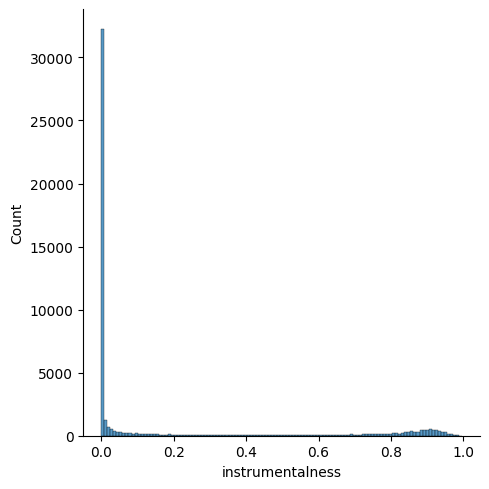

In [10]:
sns.displot(df['instrumentalness'])

<AxesSubplot:xlabel='instrumentalness'>

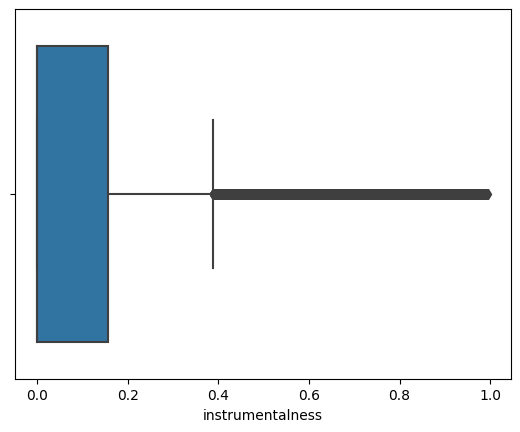

In [11]:
sns.boxplot(x=df['instrumentalness'])

## With Statistics

In [12]:
q25, q50, q75 = np.percentile(df['instrumentalness'], [25, 50, 75])
iqr = q75 - q25
min = q25 - 1.5 * iqr
max = q75 + 1.5 * iqr
print(min, q25, q75, max)

-0.23249999999999998 0.0 0.155 0.38749999999999996


In [13]:
outliers = np.array([x for x in df['instrumentalness'] if x > max])
print(outliers.shape)

(10453,)


## With Z-score

In [14]:
df['instrumentalness_Stats'] = stats.zscore(df['instrumentalness'])
df[['instrumentalness', 'instrumentalness_Stats']].describe().round(3)

,instrumentalness,instrumentalness_Stats
count,50000.000,50000.000
mean,0.182,-0.000
std,0.325,1.000
min,0.000,-0.558
25%,0.000,-0.558
50%,0.000,-0.558
75%,0.155,-0.082
max,0.996,2.503


# EDA (Exploratory Data Analysis)

In [15]:
df['music_genre'].value_counts()


Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

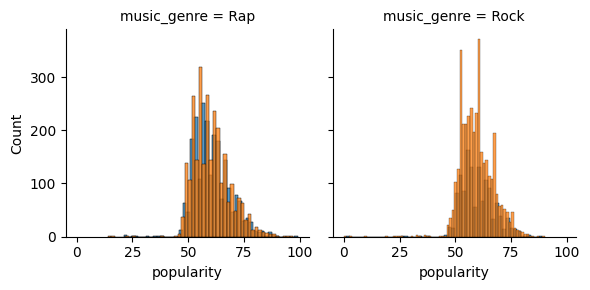

In [43]:
subset = df[(df['music_genre'] == 'Rap') | (df['music_genre'] == 'Rock')]
plot = sns.FacetGrid(subset, col='music_genre', margin_titles=True, hue='music_genre')
plot.map(sns.histplot, 'popularity')

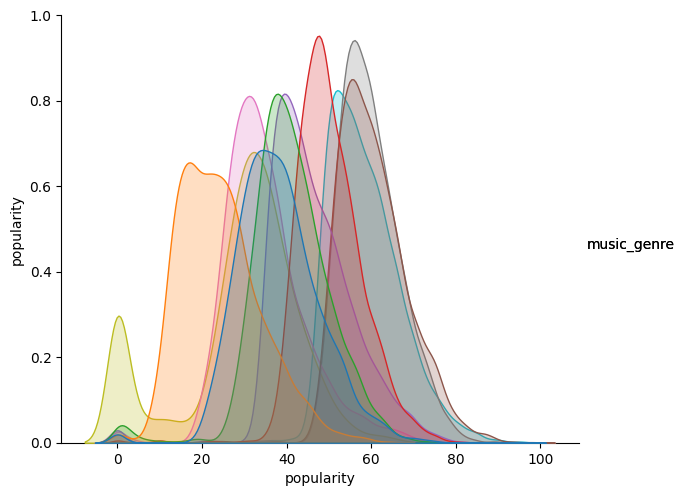

In [28]:
import matplotlib.pyplot as plt
subset = df[['popularity', 'mode', 'music_genre']]
g = sns.pairplot(subset, hue='music_genre', height=5, kind='kde')
g.add_legend()
plt.show()